In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import sys
import seaborn as sns
import os
import matplotlib.pyplot as plt
import random
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

random.seed(0)

# https://mjeensung.github.io/characterbigramtfidf/

# Load data
drive.mount('/content/gdrive', force_remount=True)
data_dir = '../content/gdrive/MyDrive/544/data'

data_path = os.path.join(data_dir, "preprocessed_data.csv")

# Load dataset
with open(os.path.join(data_dir, "X_train.npy"), 'rb') as f:
    X_train = np.load(f)
with open(os.path.join(data_dir, "X_val.npy"), 'rb') as f:
    X_val = np.load(f)
with open(os.path.join(data_dir, "X_test.npy"), 'rb') as f:
    X_test = np.load(f)

y_train = pd.read_csv(os.path.join(data_dir, "y_train.csv"))
y_val = pd.read_csv(os.path.join(data_dir, "y_val.csv"))
y_test = pd.read_csv(os.path.join(data_dir, "y_test.csv"))

Mounted at /content/gdrive


In [ ]:
# Train/val/test = 75/35/40

In [ ]:
X_train.shape

(3750, 5000)

In [ ]:
y_train = np.ravel(y_train)
y_train.shape

(3750,)

# Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_train = gnb.predict(X_train)
y_pred_val = gnb.predict(X_val)
y_pred_test = gnb.predict(X_test)


print(f"Accuracy on training set: {metrics.accuracy_score(y_train, y_pred_train):.3f}")
print(f"Accuracy on val set: {metrics.accuracy_score(y_val, y_pred_val):.3f}")
print(f"Accuracy on test set: {metrics.accuracy_score(y_test, y_pred_test):.3f}")

print(f"Accuracy on training set: {metrics.f1_score(y_train, y_pred_train):.3f}")
print(f"F1 score on val set: {metrics.f1_score(y_val, y_pred_val, average = 'macro'):.3f}")
print(f"F1 score on test set: {metrics.f1_score(y_test, y_pred_test, average = 'macro'):.3f}\n")

Accuracy on training set: 0.958
Accuracy on val set: 0.235
Accuracy on test set: 0.216
F1 score on val set: 0.234
F1 score on test set: 0.215



In [ ]:
y_train.shape

(3750,)

# SVM

In [ ]:
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto')

In [ ]:
y_pred_train = svc.predict(X_train)
y_pred_val = svc.predict(X_val)
y_pred_test = svc.predict(X_test)

In [ ]:
print(f"Accuracy on training set: {metrics.accuracy_score(y_train, y_pred_train):.3f}")
print(f"Accuracy on val set: {metrics.accuracy_score(y_val, y_pred_val):.3f}")
print(f"Accuracy on test set: {metrics.accuracy_score(y_test, y_pred_test):.3f}")

print(f"F1 score on val set: {metrics.f1_score(y_val, y_pred_val, average = 'macro'):.3f}")
print(f"F1 score on test set: {metrics.f1_score(y_test, y_pred_test, average = 'macro'):.3f}\n")

Accuracy on training set: 0.653
Accuracy on val set: 0.254
Accuracy on test set: 0.254
F1 score on val set: 0.267
F1 score on test set: 0.268



In [ ]:
print("Classification report for the validation set")
print(classification_report(y_val, y_pred_val))

Classification report for the validation set
                 precision    recall  f1-score   support

     Broooooke_       0.43      0.29      0.34        35
      DarkPiano       0.50      0.20      0.29        35
         Djalfy       0.23      0.09      0.13        35
        Dogbook       0.81      0.74      0.78        35
  DonniesGirl69       0.62      0.23      0.33        35
    Dutchrudder       0.67      0.51      0.58        35
 JBnVFCLover786       0.36      0.37      0.37        35
      Jayme1988       0.17      0.03      0.05        35
   JessMcFlyxxx       0.92      0.31      0.47        35
    Karen230683       0.29      0.11      0.16        35
MTVnHollyWEST23       0.71      0.29      0.41        35
 MiDesfileNegro       0.18      0.06      0.09        35
          Quimo       0.38      0.31      0.34        35
SallytheShizzle       0.14      0.49      0.22        35
   SongoftheOss       0.75      0.09      0.15        35
     Spidersamm       0.19      0.20      

In [ ]:
print("Classification report for the test set")
print(classification_report(y_test, y_pred_test))

Classification report for the test set
                 precision    recall  f1-score   support

     Broooooke_       0.55      0.30      0.39        20
      DarkPiano       0.67      0.10      0.17        20
         Djalfy       0.20      0.10      0.13        20
        Dogbook       0.57      0.80      0.67        20
  DonniesGirl69       0.33      0.15      0.21        20
    Dutchrudder       0.80      0.60      0.69        20
 JBnVFCLover786       0.45      0.45      0.45        20
      Jayme1988       0.00      0.00      0.00        20
   JessMcFlyxxx       1.00      0.30      0.46        20
    Karen230683       0.22      0.10      0.14        20
MTVnHollyWEST23       0.86      0.30      0.44        20
 MiDesfileNegro       0.25      0.10      0.14        20
          Quimo       0.38      0.30      0.33        20
SallytheShizzle       0.13      0.35      0.19        20
   SongoftheOss       1.00      0.20      0.33        20
     Spidersamm       0.33      0.35      0.34  

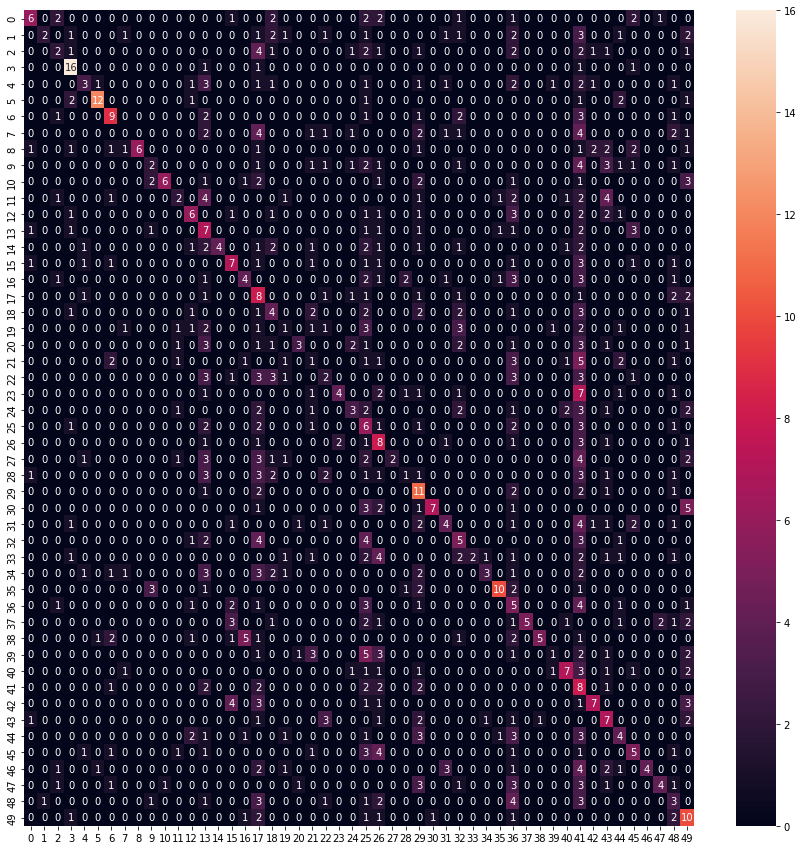

In [ ]:
mat = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize = (15,15))
sns.heatmap(mat, annot=True)
